In [134]:
import librosa
import numpy as np
import librosa.display
import csv
from scipy.signal import savgol_filter
from scipy import signal
import matplotlib.pyplot as plt

In [135]:
audio_filename = '/Users/jimmy/data/LENA/1198_LENA/AN1/segmented_2min/0.wav'

In [136]:
##Hyperparameters
n_fft = 1764
hop_length = 882
n_mels = 128

##Set your filenames
# audio_filename = 'P34_2.wav'
# output_file = "preprocessed.csv"

##Read audio file
y, sr = librosa.load(audio_filename)
duration = librosa.get_duration(y=y, sr=sr)

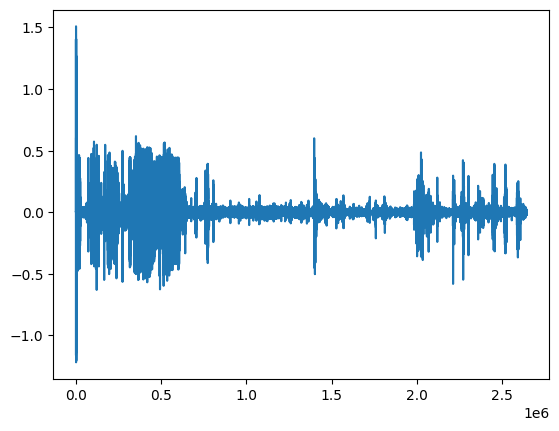

In [137]:
plt.plot(y)

In [138]:
sos = signal.butter(10, 600, 'hp', fs=sr, output='sos')
y  = signal.sosfilt(sos, y)
# We'll need IPython.display's Audio widget
from IPython.display import Audio
Audio(data=y, rate=sr)

In [139]:
x = y
x[abs(x)<0.1] = 0
x[abs(x)>0]=1

22050.0


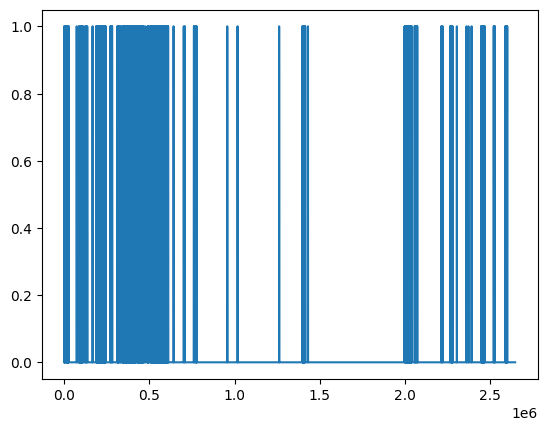

In [140]:
plt.plot(x)
print(len(y)/120) # result: 22050

In [141]:
freq = int(len(y) / 120)
# i = 1
# firstIdx = i*freq
# lastIdx = (i+1)*freq
# winSum = sum(x[firstIdx:lastIdx])
# print(winSum)
times = []
for i in range(120):
# i = 0
    firstIdx = i*freq
    lastIdx = (i+1)*freq
    winSum = -sum(x[firstIdx:lastIdx])
    times.append(int(winSum))
    # print(winSum)

In [142]:
print(times)


[-6917, -1666, 0, -32, -1508, -43, -12, -2, -3314, -14564, -7068, -1, -45, 0, -4083, -6226, -9977, -6225, -9803, -4912, -8476, -23, -938, -7130, -7595, -10458, -11057, -6414, 0, -1, 0, -2, -8, 0, -398, -345, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1037, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -171, -1415, -118, -19, 0, 0, 0, 0, 0, 0, -19, 0, -9, -209, -41, 0, 0, -12, -4, 0, -20, -238, 0, 0, -597, 0, 0, -336, 0, 0]


In [143]:
filted = savgol_filter(times, 3, 1)
filted[filted<0]=-1
filted[filted>0]=-1
filted[filted==0]=0
print(filted)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1.  0.  0.  0.  0.  0. -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.
  0.  0. -1. -1. -1.  0.  0.  0. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.
 -1. -1. -1. -1. -1.  0.  0.  0.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


In [144]:
times = filted
label = 1
lastIdx = 0
rs = []
for i in range(len(times)):
    if times[i]>=0 or i<lastIdx:
        continue
    
    r = [i,i]
    lastIdx = i
    for j in range(i,len(times)):
        if times[j]<0:
            times[j]=label
            r[-1] = j
            lastIdx = j
            if j == len(times)-1:
                rs.append(r)
        else:
            label += 1
            rs.append(r)
            break


In [145]:
print(times)
print(rs)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2.
 0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 3. 0. 0. 0. 4. 4. 4. 4. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 5. 5. 5. 5. 5. 0.
 0. 0. 0. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
[[0, 36], [42, 47], [56, 58], [62, 65], [89, 94], [99, 119]]
